#Desire to Buy vs Appliance Ownership

##General Code

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pysentani
import scipy as sp

In [2]:
survey = pd.read_excel('../data-clean/sentani-merged-cleaned-2015-06-10.xlsx',na_values=[''])
print('number of entries =', len(survey))
print('number of columns =', len(survey.columns))

number of entries = 1184
number of columns = 274


In [3]:
survey['access_type'] = pysentani.access_type(survey)
pysentani.similar_columns(survey,'app_now')

app_now
app_now/lighting
app_now/TV
app_now/radio
app_now/fridge
app_now/fan
app_now/rice_cooker
app_now/other_cooking
app_now/welder
app_now/grinder
app_now/saw
app_now/other_tools
app_now/other


In [4]:
def now_vs_buy_crosstab(now,buy):
    survey[now] = survey[now].fillna('NA')
    survey[buy] = survey[buy].fillna('NA')
    
    return pd.crosstab(survey[now],survey[buy])  

In [5]:
def contingency_table_normed(survey, column1, column2):
        print(pd.crosstab(survey[column1],
                          survey[column2]).apply(lambda r: r/r.sum(), axis=1))  

In [6]:
def dropna_ctable_normed(survey, column1, column2):
    survey[column1].dropna()
    survey[column2].dropna()
    return pd.crosstab(survey[column1],
                       survey[column2]).apply(lambda r: r/r.sum(), axis=1)

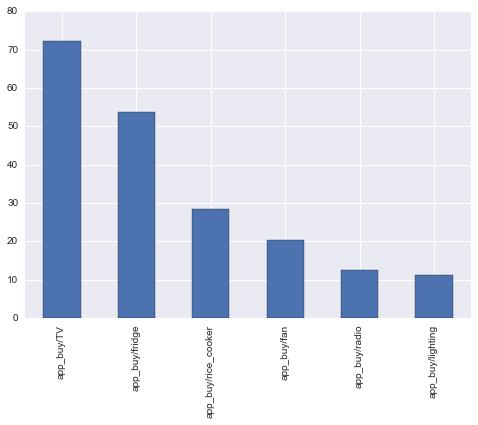

In [7]:
demand_dict = {}

def dropna_ctable_demand(survey, column1, column2):
    survey[column1].dropna()
    survey[column2].dropna()
    buy_now_df =  pd.crosstab(survey[column1],
                              survey[column2]).apply(lambda r: r/r.sum(), axis=1)
    demand_dict.update({column2 : (buy_now_df.loc[0,1] * 100)})

for (col1,col2) in (('app_now/rice_cooker','app_buy/rice_cooker'),
                    ('app_now/TV','app_buy/TV'),
                    ('app_now/fridge','app_buy/fridge'),
                    ('app_now/fan','app_buy/fan'),
                    ('app_now/lighting','app_buy/lighting'),
                    ('app_now/radio','app_buy/radio')):
    
    result = dropna_ctable_demand(survey,col1,col2)
    
    
demand_df = pd.Series(demand_dict)
demand_df.sort(inplace=True,ascending=False)
demand_df.plot(kind='bar')

In [8]:
now_vs_buy_crosstab('app_now/lighting','app_buy/lighting') 

app_buy/lighting,0.0,1.0,NA
app_now/lighting,,,
0.0,48,6,30
1.0,516,189,246
NA,11,28,110
